***HW2 - Detecting Type 1 Diabetes***

# Theory Assignment

Theoretical questions
Q1: To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

A1: Performance means how good our model is doing its job. Accuracy is the number of correct predictions made by the model by the total number of records. For us, performance is more important beacuse accuracy can be deceiving if the data is not representive enough.
For instance, if we use a binary naive classifier to determine whether a person has cancer, However the data only includes 5 positive cases out of 100 patients, we get 95% accuracy.

Q2: T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

A2: 

Using BMI and BP:
    
    pros
      - Weights will be easier to find.
      - The calculations will be simpler.
      - Data cleanning will only include two coloumns.
    cons
      - We can't be sure that these are the most important features. This can lead to diminished performance and crucial mistakes. 
        For example, a false negative case; One may not be treated well which can lead to devastating consequences.
    
Using all features:

    pros
      - The model will most likely perform better and will have better accuracy (under the assumption that our data is reliable enough)
    cons
      - Data exploration and cleanning will be difficult.
      - We'll have a lot of data meanning extended computation time.
    
        

Q3: A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

A3:

We can assume that the data won't be linearly seperable since the samples look alike and have similar properties.
Thus, we will use nonlinear SVM to find the correct boundary line.

Q4: What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

A4: LR - returns the probabilities to be a part of a certain class. 

Linear SVM - returns where each patient will be labeled.

There is one hyperparameter to tune - lambda (or C in python which is 1/lambda). 
This hyperparameter determines the bias - variance tradeoff, meaning that for low values of lambda (or high values of C), our model can be complex and we risk overfitting our training examples(high variance). in this case the model will memorise, not learn.

For high values of lambda (or low values of C) we "punish" harder our model for each misclassification and risk having an underfit condition, meaning that our model will be too simple (high bias).


# Coding Assignment:

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
# from Additional_functions import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Q1 - Data loading and preprocessing:**

In [2]:
def nan2num(dataframe):
    """
    :param dataframe: Pandas series of features
    :return: A pandas dataframe of the dictionary c_cdf containing the "clean" features
    """
    # dataframe = pd.DataFrame(dataframe).drop(extra_feature, 1)
    c_cdf = {}
    c_cdf = dataframe
    for column in dataframe.columns:
        if column == 'Age':
            i=0
        else:
            replacing_value = np.random.choice(dataframe[column])
            c_cdf[column].replace(to_replace= np.nan , value=replacing_value, inplace = True)
    return pd.DataFrame(c_cdf)

def str_to_bool_series(s):
    for index, value in s.items():
        if(value=='Yes'):
            s[index] = True
        elif(value=='No'):
            s[index] = False
        elif(value=='Male'):
            s[index] = True
        elif(value == 'Female'):
            s[index] = False
        elif(value=='Positive'):
            s[index] = True
        elif (value == 'Negative'):
            s[index] = False
#         elif(value==1):
#             s[index] = True
#         elif(value==0):
#             s[index] = False
    return s

In [3]:
df = pd.read_csv('HW2_data.csv')

In [4]:
for column in df.columns:
    str_to_bool_series(df[column])
df.tail()

C:\Users\Asaf\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Asaf\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Asaf\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Asaf\anaconda3\envs\bm-336546\lib\site-packages\i

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,True,True,True,True,True,False,NaN,True,True,True,True,True,True,False,False,True,0
561,32,True,False,False,False,False,False,NaN,False,False,True,True,False,False,False,True,True,0
562,61,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,1
563,46,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,0
564,37,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [5]:
t1d_clean = nan2num(df)

#df.fillna(value = False, inplace = True)
t1d_clean.tail()


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,True,0
561,32,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,0
562,61,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,1
563,46,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,0
564,37,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


# **Q2 -  Split the data into Test Train 20%**

In [6]:
diagnosis = t1d_clean['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))


# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [7]:
def print_dist_features(df, x_train, x_test):
    print("Feature            | Train % | Test % | Difference")
    for column in df:
        if(column=='Age'):
            age_mean_train = round(x_train[column].mean(),2)
            print(column ,end =  " "*(21-len(column))) 
            print(age_mean_train, end = " "*(5))
            age_mean_test = round(X_test[column].mean(),2)
            print(age_mean_test, end = " "*(5))
            difference = round(age_mean_train-age_mean_test,2)
            print(difference, end = " "*(5))
            print()
        elif(column=='Family History'):
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[1]-test_count[1],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[1], end = " "*(10-len(str(train_count[1]))))
            print(test_count[1], end = " "*(10-len(str(test_count[1]))))
            print(difference)
        else:
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[True]-test_count[True],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[True], end = " "*(10-len(str(train_count[True]))))
            print(test_count[True], end = " "*(10-len(str(test_count[True]))))
            print(difference)

print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  48.18     48.12     0.06     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     44.03     38.05     5.98
Sudden Weight Loss   39.16     45.13     -5.97
Weakness             56.42     60.18     -3.76
Increased Hunger     44.03     41.59     2.44
Genital Thrush       20.58     25.66     -5.08
Visual Blurring      45.8      41.59     4.21
Itching              50.22     46.02     4.2
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     35.62     36.28     -0.66
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**A3 Section a**

Imbalance between train and test set could cause the learning algorithm to fail in classification of the test set.
Balance can be reached with stratification or normalization. in our case, due to the booleanic nature of the data, its better to do stratification.

# Relationship between feature and label:

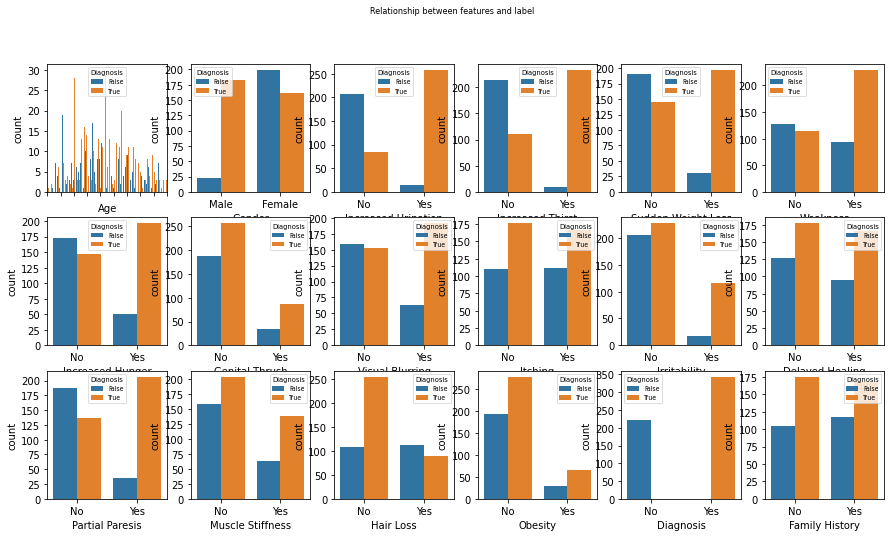

()

In [8]:
import seaborn as sbn
import matplotlib.ticker as ticker

def feature_corr(t1d_df):
    fig, axes = plt.subplots(3, 6,figsize=(15, 8) )
    sbn.set_context("paper", font_scale=0.7)
    fig.suptitle("Relationship between features and label")
    i=0
    for column in t1d_df:
        if(column=='Gender'):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x='Gender', hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['Male', 'Female'])
        elif(column=='Age'):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x='Age', hue = 'Diagnosis', data = t1d_df)
            feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
        elif(i>1):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x=column, hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['No', 'Yes'])
        i+=1
    plt.show()    
    return()

feature_corr(t1d_clean)
# from functions import feat_lab_cor
# feat_lab_cor(t1d_clean)



Additional plots:

In [9]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

# **Q4 - One Hot Vector**

In [10]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(t1d_clean.drop(columns = ['Age']).drop(columns = ['Diagnosis']))
ohv_df = pd.DataFrame(onehot)
# print(onehot)
# print((pd.DataFrame(onehot)))
X_train_ohv, X_test_ohv, y_train_ohv, y_test_ohv = train_test_split(ohv_df, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))
X_train_ohv
X_test_ohv


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
65,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
435,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
71,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
554,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
75,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
481,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
272,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
552,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Additional plots:

# **Q5 - K cross fold**
# * Change Kfold to StratifiesKfold

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [12]:
def get_score(model, X_train_gs, X_test_gs, y_train_gs, y_test_gs):
    model.fit(X_train_gs, y_train_gs)
    return model.score(X_test_gs, y_test_gs)

**Test and Fit the models**

In [13]:
skfold = StratifiedKFold(n_splits = 5)

#Define algorithms:
model_lr = LogisticRegression()
model_sgd = SGDClassifier()
model_svm = NuSVC()
model_rf = RandomForestClassifier()

#Define lists for each algorithm
score_lr = []
score_svm = []
score_rf = []
score_sgd = []

X_split = X_train_ohv
y_split = y_train_ohv
for train_index, val_index in skfold.split(X_split, y_split):
    X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_split.iloc[train_index],X_split.iloc[val_index], y_split[train_index],y_split[val_index]
    score_lr.append(get_score(model_lr,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_svm.append(get_score(model_svm,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_rf.append(get_score(model_rf,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_sgd.append(get_score(model_sgd,X_train_kf,X_test_kf,y_train_kf,y_test_kf))   

In [14]:
import statistics

print('LR: %.3f' %statistics.mean(score_lr))
print('SGD: %.3f' %statistics.mean(score_sgd))
print('SVM: %.3f' %statistics.mean(score_svm))
print('RF: %.3f' %statistics.mean(score_rf))
print((score_lr))
print((score_sgd))
print((score_svm))
print((score_rf))

LR: 0.918
SGD: 0.887
SVM: 0.934
RF: 0.962
[0.945054945054945, 0.9010989010989011, 0.9555555555555556, 0.8777777777777778, 0.9111111111111111]
[0.9120879120879121, 0.8901098901098901, 0.9111111111111111, 0.8777777777777778, 0.8444444444444444]
[0.9560439560439561, 0.9340659340659341, 0.9444444444444444, 0.9222222222222223, 0.9111111111111111]
[0.967032967032967, 0.978021978021978, 0.9555555555555556, 0.9666666666666667, 0.9444444444444444]


# **Q6 - Feature importance**

We shall use the random forest model from the previous section.

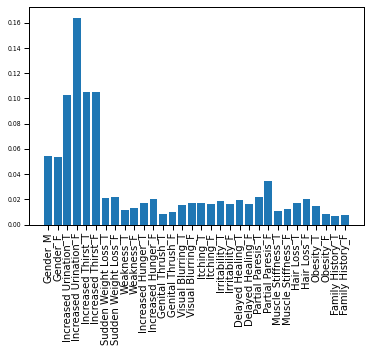

In [15]:
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ['Gender_M','Gender_F', 'Increased Urination_T','Increased Urination_F', 'Increased Thirst_T',
       'Increased Thirst_F','Sudden Weight Loss_T','Sudden Weight Loss_F', 'Weakness_T','Weakness_F',
        'Increased Hunger_T','Increased Hunger_F','Genital Thrush_T','Genital Thrush_F', 'Visual Blurring_T','Visual Blurring_F',  
        'Itching_T','Itching_F', 'Irritability_T','Irritability_F','Delayed Healing_T','Delayed Healing_F',
        'Partial Paresis_T','Partial Paresis_F', 'Muscle Stiffness_T','Muscle Stiffness_F', 'Hair Loss_T','Hair Loss_F',
        'Obesity_T','Obesity_F','Family History_T','Family History_F']
t= np.arange(0,32)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(t,labels, rotation='vertical',fontsize = '10')
plt.show()

1. As we can see, the 2 most important features are increased urination and increased thirst.

2. This matches up with the feature - label correlation from Q3. Looking at the graphs, we can see that these features are the most meaningful ones since they have the largest number of diagnosed patients. Also, among the patients who do have increased urination\thirst, the number of the healthy ones is the lowest in comparison to the diagnsed ones.

# **Q7 - Data Separability Visualization**

Section a

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train)
X_test_copy = scaler.transform(X_test)
X_train_pca = pca.fit_transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)

In [18]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

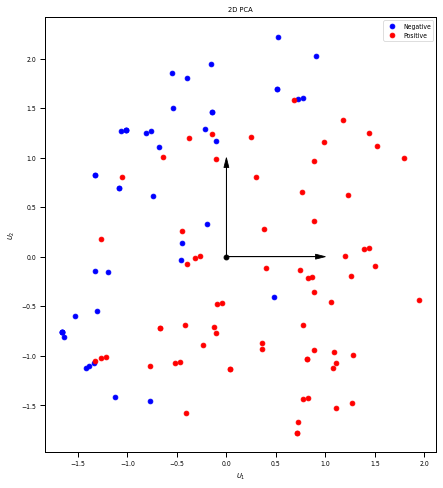

In [19]:
plt_2d_pca(X_test_pca,y_test)

Section b

As can be seen above, the data is not linearly seperable. It is possible to use a linear classifier, however the boundary condition may be misleading.

Section c

In [20]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

In [21]:
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty='l1', C=1, max_iter=10000, random_state=10)
logreg.fit(X_train_pca, y_train)
y_pred_test = logreg.predict(X_test_pca)
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss = log_loss(y_test, y_pred_test)
AUC = metrics.roc_auc_score(y_test, y_pred_test)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f} \nAUC is {:.2f} '.format(Acc,F1,loss,AUC))

Accuracy is 0.84. 
F1 is 0.87. 
Loss is 5.50 
AUC is 0.84 


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(C=100, kernel='rbf',gamma='auto',probability=True)
svc.fit(X_train_pca, y_train)  

SVC(C=100, gamma='auto', probability=True)

In [23]:

y_pred_test1 = svc.predict(X_test_pca) 
TN1 = calc_TN(y_test, y_pred_test1)
FP1 = calc_FP(y_test, y_pred_test1)
FN1 = calc_FN(y_test, y_pred_test1)
TP1 = calc_TP(y_test, y_pred_test1)
Se1 = TP1/(TP1+FN1)
Sp1 = TN1/(TN1+FP1)
PPV1 = TP1/(TP1+FP1)
Acc1 = (TP1+TN1)/(TP1+TN1+FP1+FN1)
F11 = (2*Se1*PPV1)/(Se1+PPV1)
loss3 = hinge_loss(y_test, y_pred_test1)
AUC1 = metrics.roc_auc_score(y_test, y_pred_test1)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f} \nAUC is {:.2f} '.format(Acc,F1,loss,AUC1))

Accuracy is 0.84. 
F1 is 0.87. 
Loss is 5.50 
AUC is 0.87 


Section d

In [26]:
feat_name =['Increased Urination','Increased Thirst']
X_train_2feat = X_train[feat_name]
X_test_2feat =  X_test[feat_name]

In [27]:
logreg1 = LogisticRegression(solver='saga', multi_class='ovr', penalty='l1', C=1, max_iter=10000, random_state=10)
logreg1.fit(X_train_2feat, y_train)
y_pred_test2 = logreg.predict(X_test_2feat) 
TN2 = calc_TN(y_test, y_pred_test2)
FP2 = calc_FP(y_test, y_pred_test2)
FN2 = calc_FN(y_test, y_pred_test2)
TP2 = calc_TP(y_test, y_pred_test2)
Se2 = TP2/(TP2+FN2)
Sp2 = TN2/(TN2+FP2)
PPV2 = TP2/(TP2+FP2)
Acc2 = (TP2+TN2)/(TP2+TN2+FP2+FN2)
F12 = (2*Se*PPV)/(Se2+PPV2)
loss2 = log_loss(y_test, y_pred_test2)
AUC2 = metrics.roc_auc_score(y_test, y_pred_test2)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f} \nAUC is {:.2f} '.format(Acc,F1,loss,AUC2))

Accuracy is 0.84. 
F1 is 0.87. 
Loss is 5.50 
AUC is 0.47 


In [28]:
svc1 = SVC(C=100, kernel='rbf',gamma='auto',probability=True)
svc1.fit(X_train_2feat, y_train)  
y_pred_test3 = svc.predict(X_test_2feat) 
TN3 = calc_TN(y_test, y_pred_test3)
FP3 = calc_FP(y_test, y_pred_test3)
FN3 = calc_FN(y_test, y_pred_test3)
TP3 = calc_TP(y_test, y_pred_test3)
Se3 = TP3/(TP3+FN3)
Sp3 = TN3/(TN3+FP3)
PPV3 = TP3/(TP3+FP3)
Acc3 = (TP3+TN3)/(TP3+TN3+FP3+FN3)
F13 = (2*Se3*PPV3)/(Se3+PPV3)
loss5 = hinge_loss(y_test, y_pred_test3)
AUC3 = metrics.roc_auc_score(y_test, y_pred_test3)
print('Accuracy is {:.2f}. \nF1 is {:.2f}. \nLoss is {:.2f} \nAUC is {:.2f} '.format(Acc,F1,loss,AUC3))


Accuracy is 0.84. 
F1 is 0.87. 
Loss is 5.50 
AUC is 0.50 
